In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/wine-clustering.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
# Data exploration
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
co

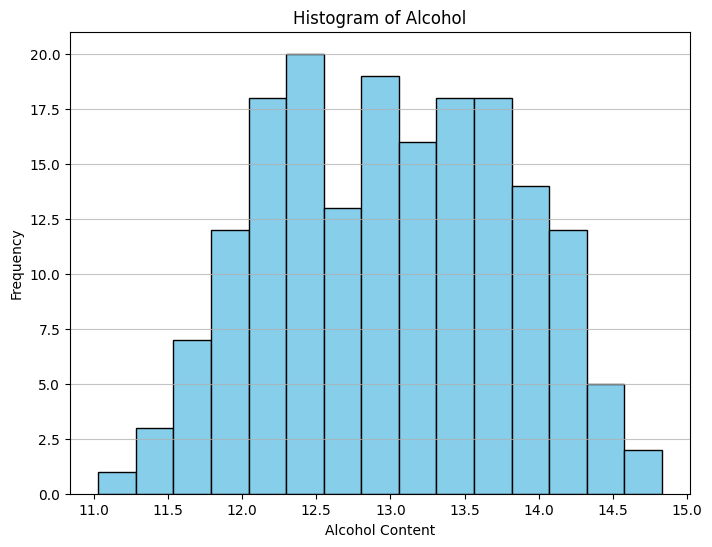

In [8]:
# 1. Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Alcohol'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

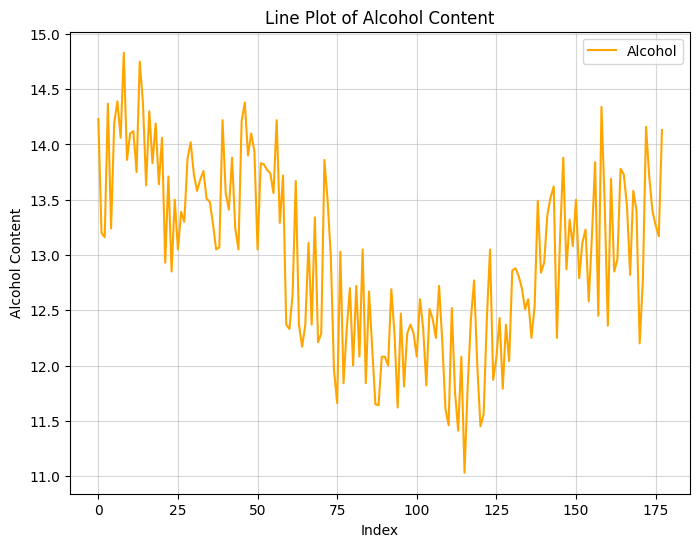

In [9]:
# 2. Line Plot
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['Alcohol'], label='Alcohol', color='orange')
plt.title('Line Plot of Alcohol Content')
plt.xlabel('Index')
plt.ylabel('Alcohol Content')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

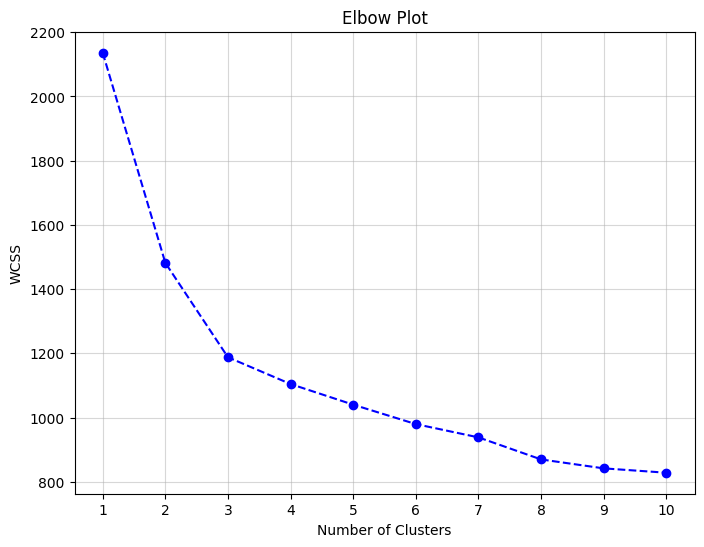

In [10]:
# 3. Elbow Plot for KMeans Clustering
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])  # Exclude 'Alcohol' if clustering other features

# Calculate WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(alpha=0.5)
plt.show()

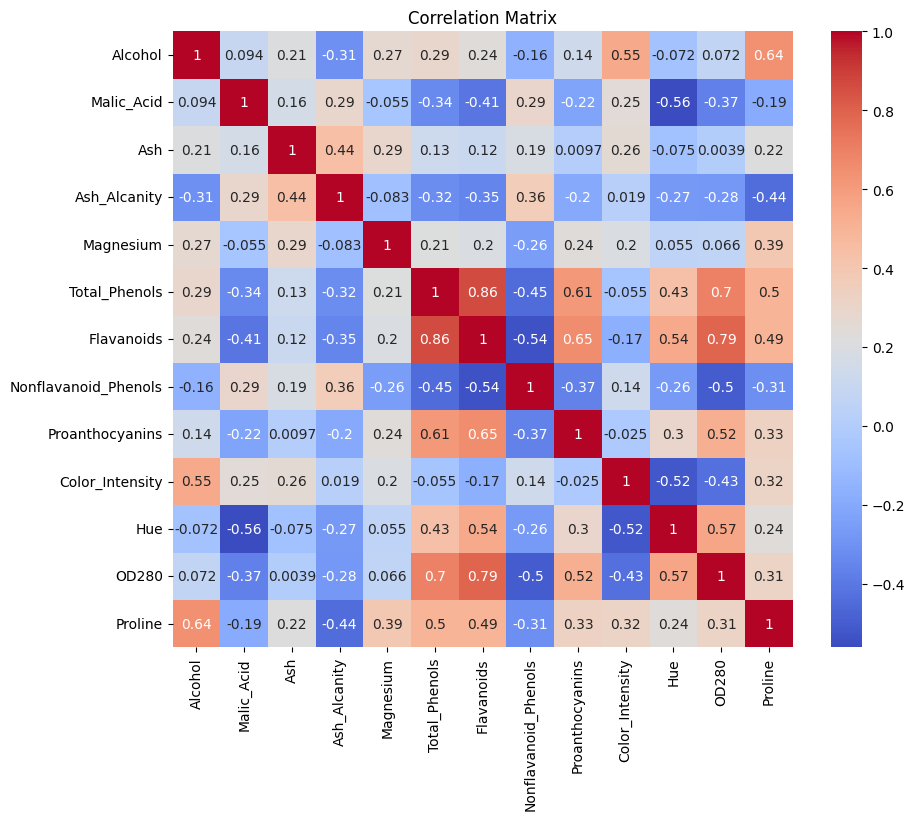

In [11]:
# 4. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Cluster centers:
[[-0.35315619 -0.46687385  0.23139163 -0.64403942 -0.16593847 -0.02800099
   0.06980726 -0.11213746 -0.92651429  0.47458392  0.27012353 -0.82867165]
 [ 0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029 -1.21524764
   0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163 -0.40708796]
 [-0.34733103  0.25430244 -0.58207906  0.59715068  0.86333733  0.92176358
  -0.59533423  0.67056519  0.08288917  0.46200513  0.72820041  0.99745567]]


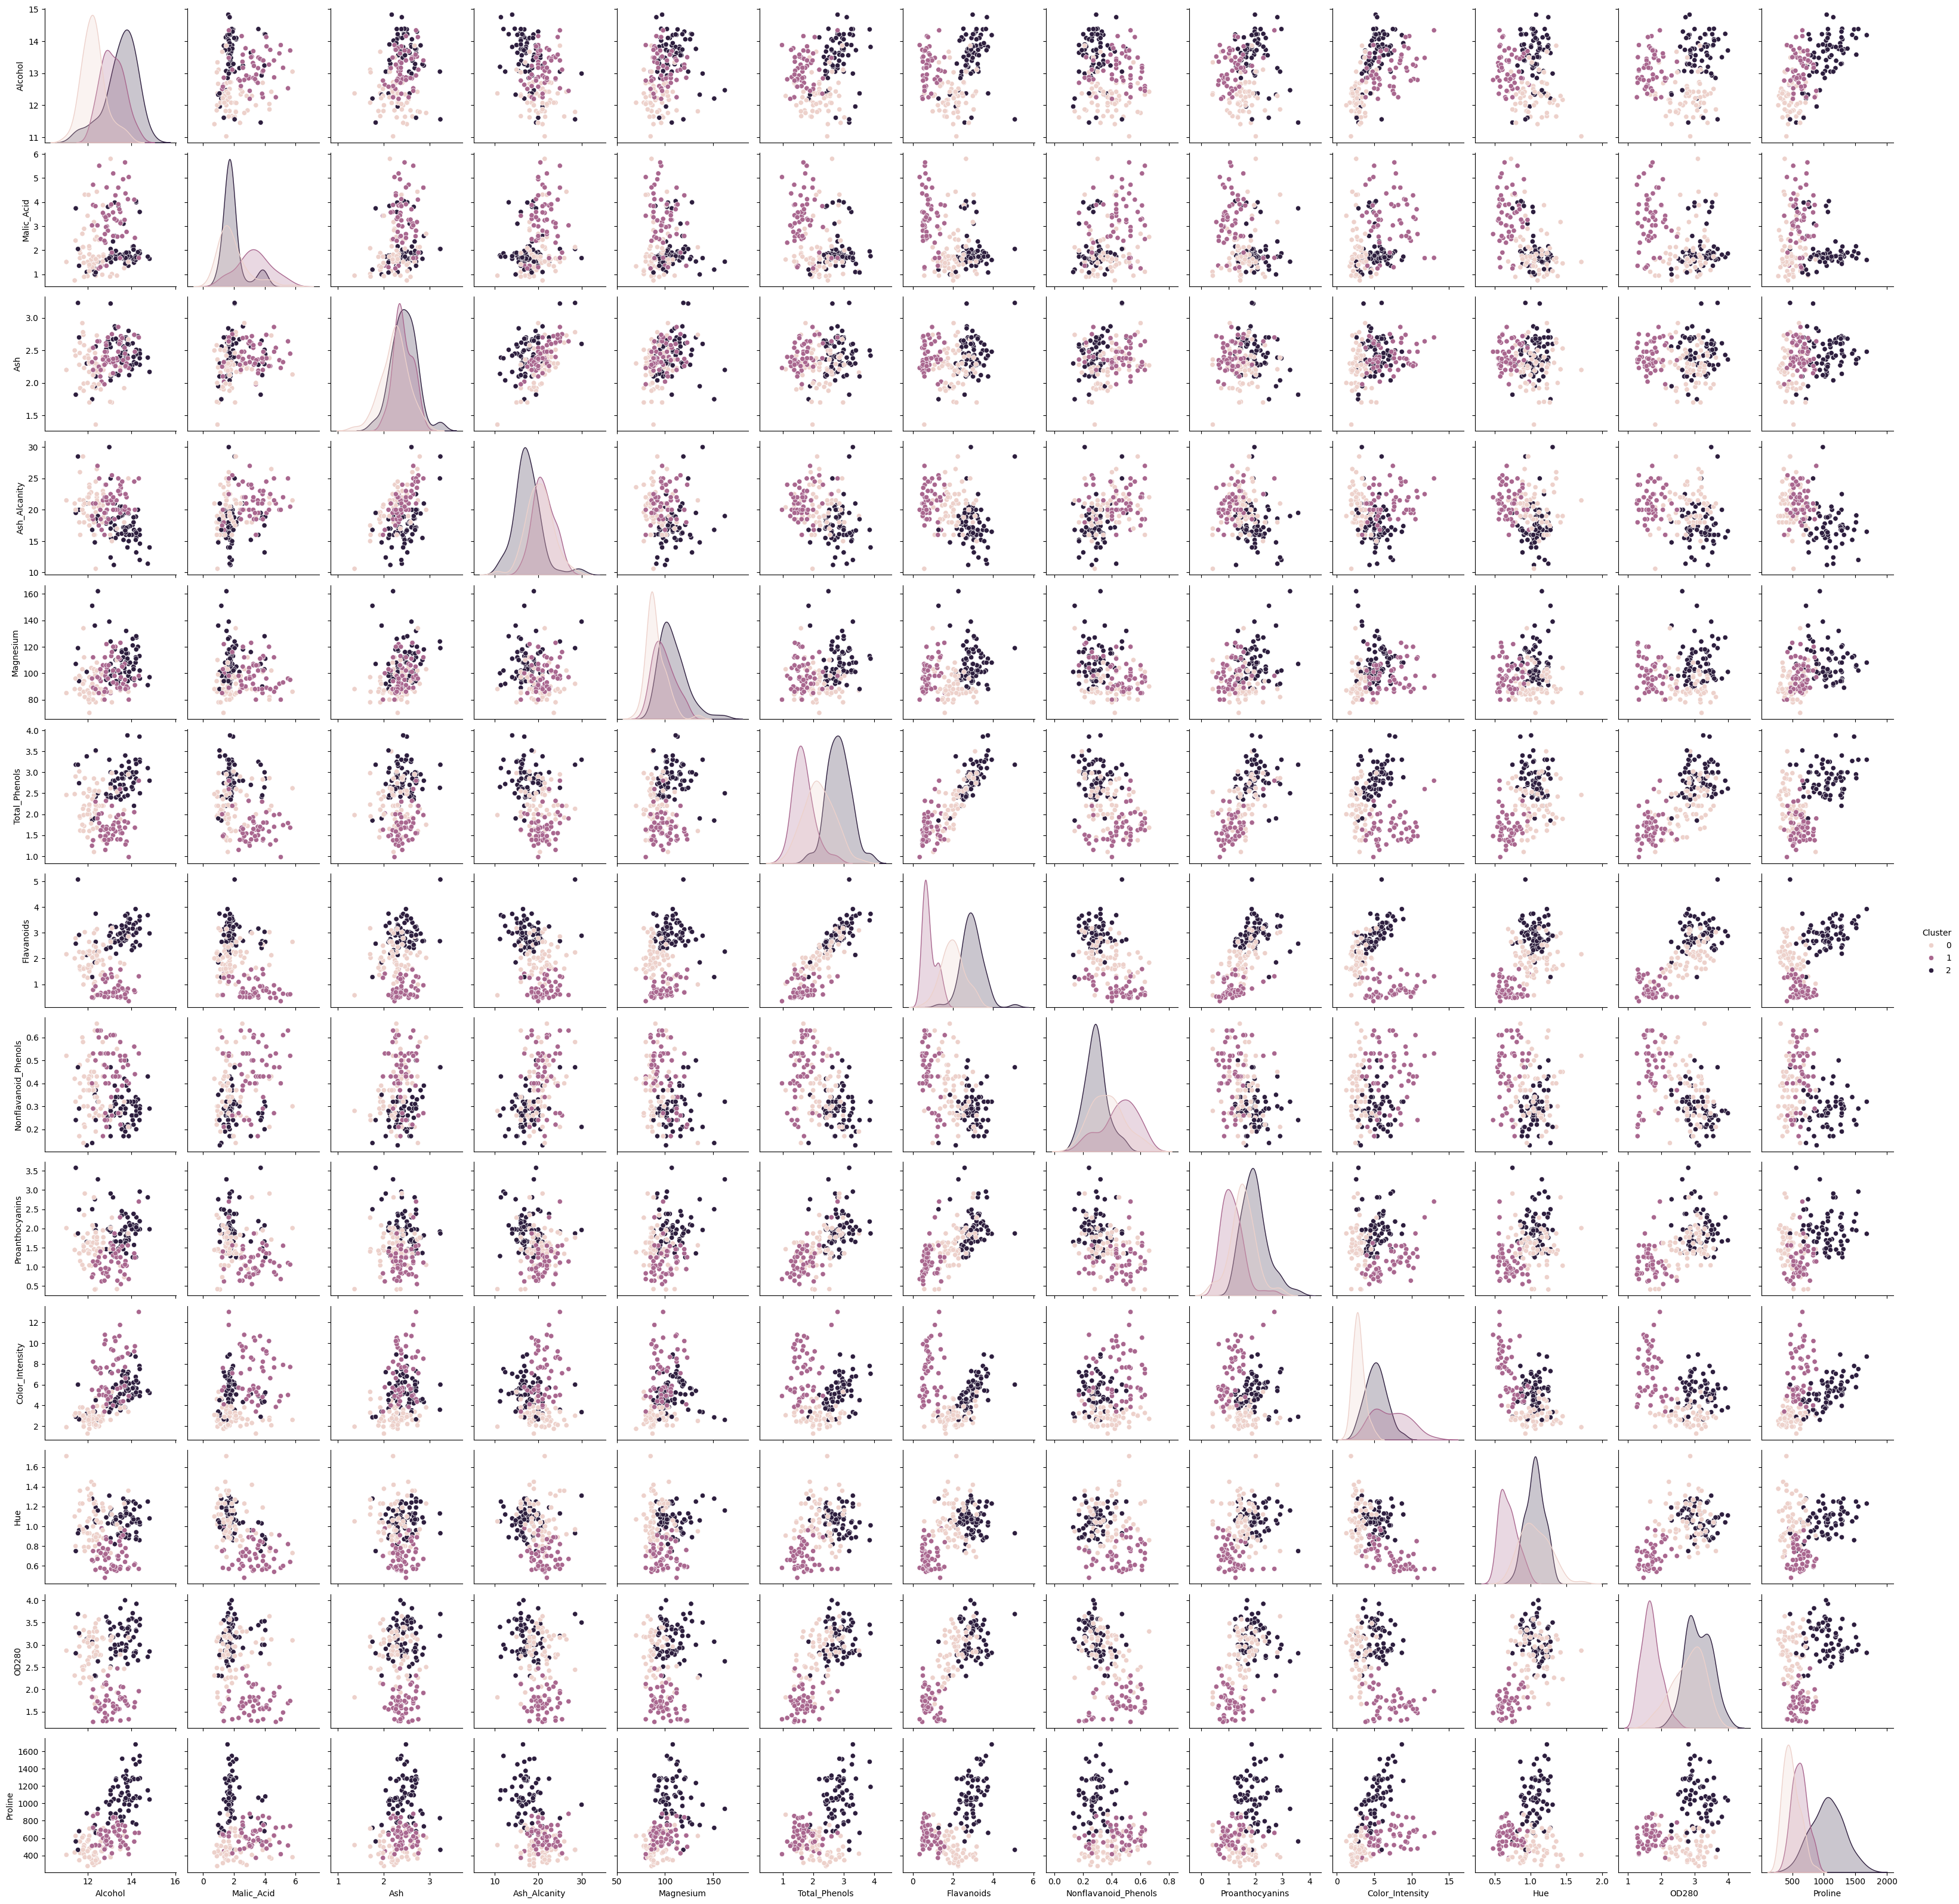

In [12]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

print("Cluster centers:")
print(kmeans.cluster_centers_)

# Visualization of clusters
sns.pairplot(data, hue='Cluster', diag_kind='kde')
plt.show()

Mean Squared Error: 0.18571608706852522
R^2 Score: 0.6889364317843805
Coefficients of the regression model:
Malic_Acid              0.112887
Ash                     0.268318
Ash_Alcanity           -0.046854
Magnesium              -0.001801
Total_Phenols           0.091979
Flavanoids             -0.010802
Nonflavanoid_Phenols   -0.124330
Proanthocyanins        -0.142778
Color_Intensity         0.169749
Hue                     0.403695
OD280                   0.119319
Proline                 0.000990
dtype: float64


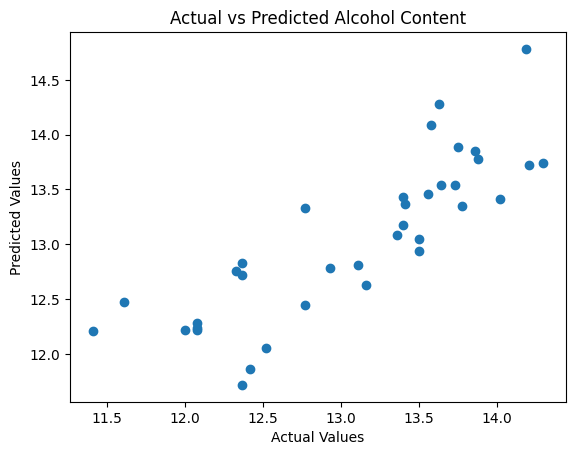

In [13]:
# Splitting data for regression
X = data.drop(columns=['Alcohol', 'Cluster'])  # Features (excluding target and cluster label)
y = data['Alcohol']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Coefficients of the model
print("Coefficients of the regression model:")
print(pd.Series(lr.coef_, index=X.columns))

# Visualization of predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Alcohol Content")
plt.show()